In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Untitled folder/wav

/content/gdrive/My Drive/Untitled folder/wav


In [3]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [4]:
num_rows = 128
num_columns = 128
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 6
num_seconds = 2.9
fine_tune_at = 300
base_lr = 0.0001

In [5]:
featuresdf = data_load.make_dataframe_2speakers(num_speakers, './', num_rows, num_columns, num_seconds, 'A.J._Buckley', 'Abbie_Cornish')

./id10001/1zcIwhmdeo4/00001.wav
Yes
./id10001/1zcIwhmdeo4/00002.wav
Yes
./id10001/1zcIwhmdeo4/00003.wav
Yes
./id10001/J9lHsKG98U8/00003.wav
Yes
./id10001/J9lHsKG98U8/00002.wav
Yes
./id10001/J9lHsKG98U8/00001.wav
Yes
./id10001/J9lHsKG98U8/00006.wav
Yes
./id10001/J9lHsKG98U8/00005.wav
Yes
./id10001/J9lHsKG98U8/00004.wav
Yes
./id10001/J9lHsKG98U8/00007.wav
Yes
./id10001/J9lHsKG98U8/00008.wav
Yes
./id10001/J9lHsKG98U8/00010.wav
Yes
./id10001/J9lHsKG98U8/00009.wav
Yes
./id10001/J9lHsKG98U8/00015.wav
Yes
./id10001/J9lHsKG98U8/00014.wav
Yes
./id10001/J9lHsKG98U8/00013.wav
Yes
./id10001/J9lHsKG98U8/00011.wav
Yes
./id10001/J9lHsKG98U8/00016.wav
Yes
./id10001/J9lHsKG98U8/00012.wav
Yes
./id10001/J9lHsKG98U8/00021.wav
Yes
./id10001/J9lHsKG98U8/00019.wav
Yes
./id10001/J9lHsKG98U8/00020.wav
Yes
./id10001/J9lHsKG98U8/00017.wav
Yes
./id10001/J9lHsKG98U8/00018.wav
Yes
./id10001/J9lHsKG98U8/00025.wav
Yes
./id10001/J9lHsKG98U8/00023.wav
Yes
./id10001/J9lHsKG98U8/00026.wav
Yes
./id10001/J9lHsKG98U8/00022.

In [6]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

In [7]:
base_model = learn.get_densenet(num_rows, num_columns, num_channels, num_labels, fine_tune_at)

29089792/29084464 [==============================] - 0s 0us/step
Number of layers in the base model:  428
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]

In [8]:
model = learn.build_model_densenet(base_model, num_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 2,891,458
Non-trainable params: 4,148,096
_________________________________________________________________


In [9]:
learn.compile_model_pretrained_net(model, base_lr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


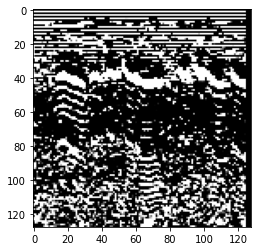

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
path = 'id10001/9mQ11vBs1wc/00004.wav'
#render.show_mfccs(path, num_rows, num_columns, num_seconds)

data = result_sets[0][1]
plt.imshow(data, cmap=cm.gray)

In [11]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 2,891,458
Non-trainable params: 4,148,096
_________________________________________________________________
6/6 [==============================] - 6s 1s/step - loss: 3.5006 - accuracy: 0.6173
Pre-training accuracy: 61.7284%


In [12]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'DenseNetMF', 'default', 'DenseNetMF')

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.8086
Epoch 00001: val_loss improved from inf to 1.94467, saving model to saved_models/weights.best.DenseNet2Men.hdf5
13/13 [==============================] - 15s 1s/step - loss: 0.5076 - accuracy: 0.8086 - val_loss: 1.9447 - val_accuracy: 0.6585
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9321
Epoch 00002: val_loss improved from 1.94467 to 1.74705, saving model to saved_models/weights.best.DenseNet2Men.hdf5
13/13 [==============================] - 13s 1s/step - loss: 0.1776 - accuracy: 0.9321 - val_loss: 1.7470 - val_accuracy: 0.6585
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9198
Epoch 00003: val_loss improved from 1.74705 to 1.29417, saving model to saved_models/weights.best.DenseNet2Men.hdf5
13/13 [==============================] - 13s 1s/step - loss: 0.1970 - accuracy: 0.9198 - val_loss: 1.2942 - val_a

In [13]:
evaluate.evaluate_model(model, 'DenseNetMF', result_sets)

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [14]:
evaluate.display_metrics(model, 'DenseNetMF', result_sets)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        27

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Confusion matrix: 
[[14  0]
 [ 0 27]]


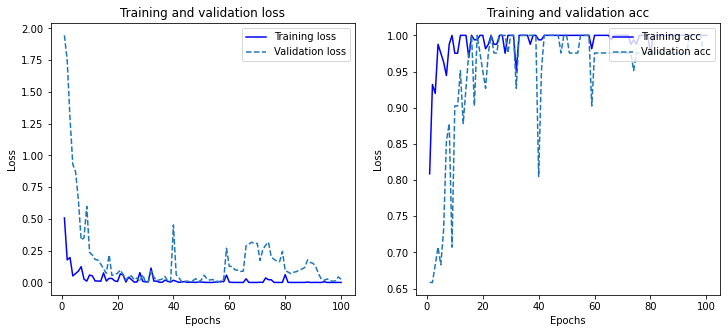

In [15]:
evaluate.plot_history(history)